In [1]:
import geopandas as gpd
import geemap
import ee

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Load the GeoJSON file
geojson_path = 'JHB_GCRO_Selected_variables.geojson'
gdf = gpd.read_file(geojson_path)

# Sanitize the property names
def sanitize_column_names(gdf):
    gdf.columns = gdf.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)
    return gdf

gdf = sanitize_column_names(gdf)

# Convert the GeoDataFrame to an Earth Engine object
ee_fc = geemap.geopandas_to_ee(gdf)

# Create a map
Map = geemap.Map()

# Add the GeoJSON layer to the map
Map.addLayer(ee_fc, {}, "Heat Vulnerability Index")

# Display the map
Map.centerObject(ee_fc, 10)
Map




Map(center=[-26.176814917998072, 27.9632492022089], controls=(WidgetControl(options=['position', 'transparent_…

In [2]:
import geopandas as gpd
import geemap
import ee

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Load the GeoJSON file
geojson_path = 'JHB_GCRO_Selected_variables.geojson'
gdf = gpd.read_file(geojson_path)

# Sanitize the property names
def sanitize_column_names(gdf):
    gdf.columns = gdf.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)
    return gdf

gdf = sanitize_column_names(gdf)

# Convert the GeoDataFrame to an Earth Engine object
ee_fc = geemap.geopandas_to_ee(gdf)

# Create a map
Map = geemap.Map()

# Function to add a layer to the map with specific visualization parameters
def add_layer_to_map(ee_fc, column_name, vis_params, layer_name):
    ee_image = ee_fc.reduceToImage([column_name], ee.Reducer.first())
    Map.addLayer(ee_image, vis_params, layer_name)

# Define visualization parameters for different layers
vis_params_utfvi = {
    'min': gdf['UTFVI'].min(),
    'max': gdf['UTFVI'].max(),
    'palette': ['blue', 'green', 'yellow', 'red']
}

vis_params_lst = {
    'min': gdf['LST'].min(),
    'max': gdf['LST'].max(),
    'palette': ['blue', 'green', 'yellow', 'red']
}

vis_params_ndvi = {
    'min': gdf['NDVI'].min(),
    'max': gdf['NDVI'].max(),
    'palette': ['blue', 'green', 'yellow', 'red']
}

vis_params_ndbi = {
    'min': gdf['NDBI__mean'].min(),
    'max': gdf['NDBI__mean'].max(),
    'palette': ['blue', 'green', 'yellow', 'red']
}

# Add the layers to the map
add_layer_to_map(ee_fc, 'UTFVI', vis_params_utfvi, 'UTFVI')
add_layer_to_map(ee_fc, 'LST', vis_params_lst, 'LST')
add_layer_to_map(ee_fc, 'NDVI', vis_params_ndvi, 'NDVI')
add_layer_to_map(ee_fc, 'NDBI__mean', vis_params_ndbi, 'NDBI__mean')

# Add health-related layers
health_layers = {
    'concern_he': 'Concern Health',
    'cancer_pro': 'Cancer Proportion',
    'diabetes_p': 'Diabetes Proportion',
    'pneumonia_': 'Pneumonia Proportion',
    'heart_dise': 'Heart Disease Proportion',
    'hypertensi': 'Hypertension Proportion',
    'hiv_prop': 'HIV Proportion',
    'tb_prop': 'TB Proportion',
    'covid_prop': 'COVID Proportion',
    '60_plus_pr': '60 Plus Proportion'
}

for column, name in health_layers.items():
    if column in gdf.columns:
        vis_params = {
            'min': gdf[column].min(),
            'max': gdf[column].max(),
            'palette': ['blue', 'green', 'yellow', 'red']
        }
        add_layer_to_map(ee_fc, column, vis_params, name)

# Center the map on the data
Map.centerObject(ee_fc, 10)

# Display the map
Map


Map(center=[-26.176814917998072, 27.9632492022089], controls=(WidgetControl(options=['position', 'transparent_…

In [3]:
import geopandas as gpd
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import geemap
import ee

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Load the GeoJSON file
geojson_path = 'JHB_GCRO_Selected_variables.geojson'
gdf = gpd.read_file(geojson_path)

# Sanitize the property names
def sanitize_column_names(gdf):
    gdf.columns = gdf.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)
    return gdf

gdf = sanitize_column_names(gdf)

# Select relevant columns for PCA
columns = [
    'UTFVI', 'LST', 'NDVI', 'NDBI__mean', 'concern_he', 'cancer_pro',
    'diabetes_p', 'pneumonia_', 'heart_dise', 'hypertensi', 'hiv_prop',
    'tb_prop', 'covid_prop', '60_plus_pr'
]

# Ensure columns are numeric and fill missing values
for col in columns:
    gdf[col] = pd.to_numeric(gdf[col], errors='coerce')
gdf = gdf.dropna(subset=columns)

# Extract features
features = gdf[columns].values

# Perform PCA on features
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)
explained_variance = pca.explained_variance_ratio_

# Add PCA results to GeoDataFrame
gdf['PC1'] = principal_components[:, 0]
gdf['PC2'] = principal_components[:, 1]

# Visualize the largest HVI per ward using the first principal component
gdf['HVI'] = gdf['PC1']  # Assuming PC1 represents the largest HVI

# Convert the GeoDataFrame to an Earth Engine object
ee_fc = geemap.geopandas_to_ee(gdf)

# Create a map
Map = geemap.Map()

# Define visualization parameters for HVI
vis_params_hvi = {
    'min': gdf['HVI'].min(),
    'max': gdf['HVI'].max(),
    'palette': ['blue', 'green', 'yellow', 'red']
}

# Add HVI layer to the map
ee_image = ee_fc.reduceToImage(['HVI'], ee.Reducer.first())
Map.addLayer(ee_image, vis_params_hvi, 'Heat Vulnerability Index (HVI)')

# Center the map on the data
Map.centerObject(ee_fc, 10)

# Display the map
Map

# Print explained variance
print("Explained Variance Ratio by Principal Components:")
print(explained_variance)

# Print feature loadings
print("Feature Loadings:")
print(pca.components_)


Explained Variance Ratio by Principal Components:
[0.94233636 0.0515689 ]
Feature Loadings:
[[ 1.37604981e-04  3.00998257e-03  6.32159381e-04 -1.32383192e-04
   9.99894582e-01  1.41890169e-02  4.41755958e-06  2.71398032e-07
   6.96537618e-07  1.58795966e-05 -4.96618390e-06 -4.36115127e-06
   3.13168775e-06  1.11041946e-05]
 [-1.69307559e-03 -6.54209505e-02  2.25909849e-03 -1.06409447e-03
  -1.39630636e-02  9.97755488e-01  5.13615588e-05  9.79704988e-06
   3.88932445e-05  9.38471001e-05  7.77805367e-06  2.66090673e-05
   1.83668008e-05  4.05267520e-05]]


Explained Variance Ratio by Principal Components:
[0.94233636 0.0515689 ]
Feature Loadings:
[[ 1.37604981e-04  3.00998257e-03  6.32159381e-04 -1.32383192e-04
   9.99894582e-01  1.41890169e-02  4.41755958e-06  2.71398032e-07
   6.96537618e-07  1.58795966e-05 -4.96618390e-06 -4.36115127e-06
   3.13168775e-06  1.11041946e-05]
 [-1.69307559e-03 -6.54209505e-02  2.25909849e-03 -1.06409447e-03
  -1.39630636e-02  9.97755488e-01  5.13615588e-05  9.79704988e-06
   3.88932445e-05  9.38471001e-05  7.77805367e-06  2.66090673e-05
   1.83668008e-05  4.05267520e-05]]


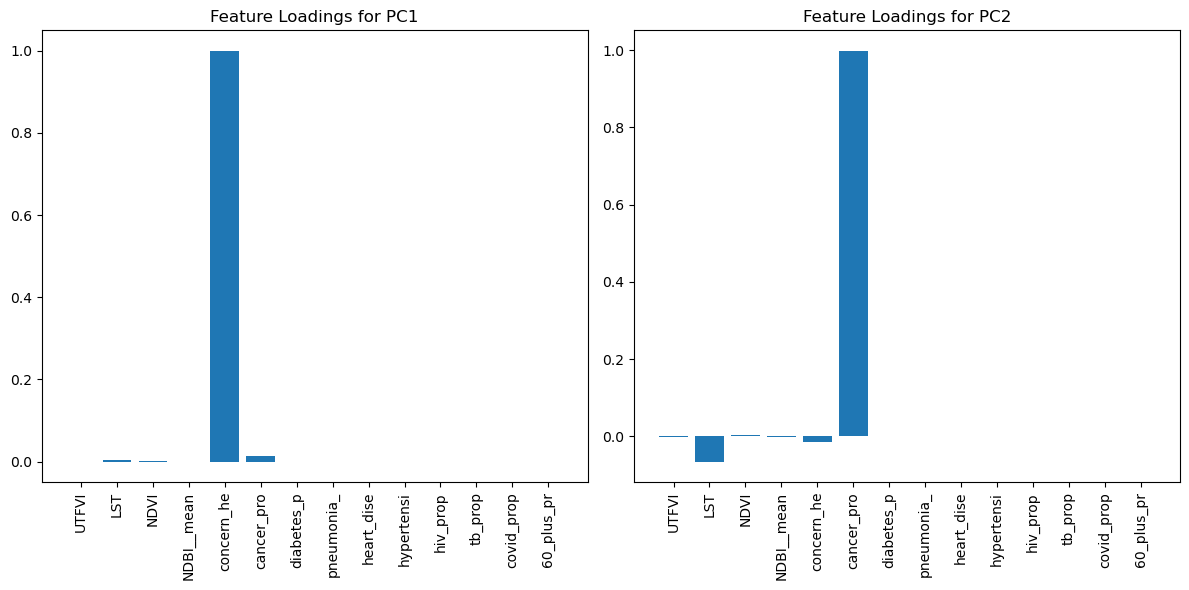

In [4]:
import geopandas as gpd
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import geemap
import ee

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Load the GeoJSON file
geojson_path = 'JHB_GCRO_Selected_variables.geojson'
gdf = gpd.read_file(geojson_path)

# Sanitize the property names
def sanitize_column_names(gdf):
    gdf.columns = gdf.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)
    return gdf

gdf = sanitize_column_names(gdf)

# Select relevant columns for PCA
columns = [
    'UTFVI', 'LST', 'NDVI', 'NDBI__mean', 'concern_he', 'cancer_pro',
    'diabetes_p', 'pneumonia_', 'heart_dise', 'hypertensi', 'hiv_prop',
    'tb_prop', 'covid_prop', '60_plus_pr'
]

# Ensure columns are numeric and fill missing values
for col in columns:
    gdf[col] = pd.to_numeric(gdf[col], errors='coerce')
gdf = gdf.dropna(subset=columns)

# Extract features
features = gdf[columns].values

# Perform PCA on features
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)
explained_variance = pca.explained_variance_ratio_

# Add PCA results to GeoDataFrame
gdf['PC1'] = principal_components[:, 0]
gdf['PC2'] = principal_components[:, 1]

# Convert the GeoDataFrame to an Earth Engine object
ee_fc = geemap.geopandas_to_ee(gdf)

# Create a map
Map = geemap.Map()

# Define visualization parameters for PC1
vis_params_pc1 = {
    'min': gdf['PC1'].min(),
    'max': gdf['PC1'].max(),
    'palette': ['blue', 'green', 'yellow', 'red']
}

# Define visualization parameters for PC2
vis_params_pc2 = {
    'min': gdf['PC2'].min(),
    'max': gdf['PC2'].max(),
    'palette': ['blue', 'green', 'yellow', 'red']
}

# Add PC1 layer to the map
ee_image_pc1 = ee_fc.reduceToImage(['PC1'], ee.Reducer.first())
Map.addLayer(ee_image_pc1, vis_params_pc1, 'Principal Component 1 (PC1)')

# Add PC2 layer to the map
ee_image_pc2 = ee_fc.reduceToImage(['PC2'], ee.Reducer.first())
Map.addLayer(ee_image_pc2, vis_params_pc2, 'Principal Component 2 (PC2)')

# Center the map on the data
Map.centerObject(ee_fc, 10)

# Display the map
Map

# Print explained variance
print("Explained Variance Ratio by Principal Components:")
print(explained_variance)

# Print feature loadings
print("Feature Loadings:")
print(pca.components_)

# Plot the feature loadings
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(columns, pca.components_[0])
plt.title('Feature Loadings for PC1')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(columns, pca.components_[1])
plt.title('Feature Loadings for PC2')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


HVI threshold for top 10%: 0.4532776490332661
Number of wards with high HVI: 14


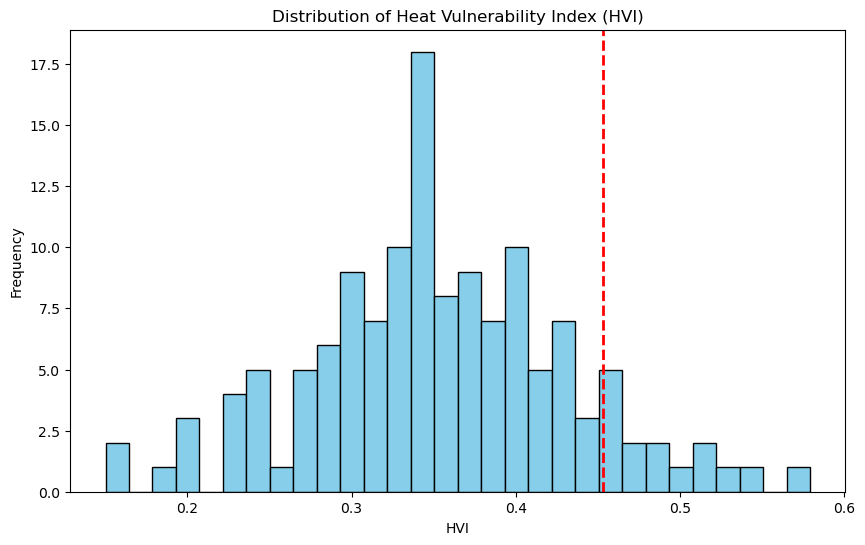

In [5]:
import geopandas as gpd
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import geemap
import ee

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Load the GeoJSON file
geojson_path = 'JHB_GCRO_Selected_variables.geojson'
gdf = gpd.read_file(geojson_path)

# Sanitize the property names
def sanitize_column_names(gdf):
    gdf.columns = gdf.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)
    return gdf

gdf = sanitize_column_names(gdf)

# Select relevant columns for HVI calculation
columns = [
    'UTFVI', 'LST', 'NDVI', 'NDBI__mean', 'concern_he', 'cancer_pro',
    'diabetes_p', 'pneumonia_', 'heart_dise', 'hypertensi', 'hiv_prop',
    'tb_prop', 'covid_prop', '60_plus_pr'
]

# Ensure columns are numeric and fill missing values
for col in columns:
    gdf[col] = pd.to_numeric(gdf[col], errors='coerce')
gdf = gdf.dropna(subset=columns)

# Normalize the data
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(gdf[columns])

# Create the composite HVI by averaging the normalized features
gdf['HVI'] = normalized_features.mean(axis=1)

# Convert the GeoDataFrame to an Earth Engine object
ee_fc = geemap.geopandas_to_ee(gdf)

# Create a map
Map = geemap.Map()

# Define visualization parameters for HVI
vis_params_hvi = {
    'min': gdf['HVI'].min(),
    'max': gdf['HVI'].max(),
    'palette': ['blue', 'green', 'yellow', 'red']
}

# Add HVI layer to the map
ee_image_hvi = ee_fc.reduceToImage(['HVI'], ee.Reducer.first())
Map.addLayer(ee_image_hvi, vis_params_hvi, 'Heat Vulnerability Index (HVI)')

# Highlight wards with the highest HVI (top 10%)
threshold = np.percentile(gdf['HVI'], 90)
high_hvi_wards = gdf[gdf['HVI'] >= threshold]

# Convert the high HVI wards to an Earth Engine object
ee_fc_high_hvi = geemap.geopandas_to_ee(high_hvi_wards)

# Define visualization parameters for high HVI wards
vis_params_high_hvi = {
    'color': 'red'
}

# Add high HVI wards layer to the map
Map.addLayer(ee_fc_high_hvi, vis_params_high_hvi, 'High HVI Wards')

# Center the map on the data
Map.centerObject(ee_fc, 10)

# Display the map
Map

# Print the threshold and number of high HVI wards
print(f"HVI threshold for top 10%: {threshold}")
print(f"Number of wards with high HVI: {len(high_hvi_wards)}")

# Plot the HVI distribution and highlight the threshold
plt.figure(figsize=(10, 6))
plt.hist(gdf['HVI'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribution of Heat Vulnerability Index (HVI)')
plt.xlabel('HVI')
plt.ylabel('Frequency')
plt.show()


High HVI Wards:
      WardID_ WardNo_       HVI
0    74205010      10  0.454687
2    79800002       2  0.455504
9    79800009       9  0.510749
16   79800016      16  0.579272
19   79800019      19  0.529908
20   79800020      20  0.465144
25   79800025      25  0.544048
27   79800027      27  0.455179
35   79800035      35  0.484166
47   79800047      47  0.521749
51   79800051      51  0.480301
55   79800055      55  0.472422
103  79800104     104  0.499119
104  79800105     105  0.460566


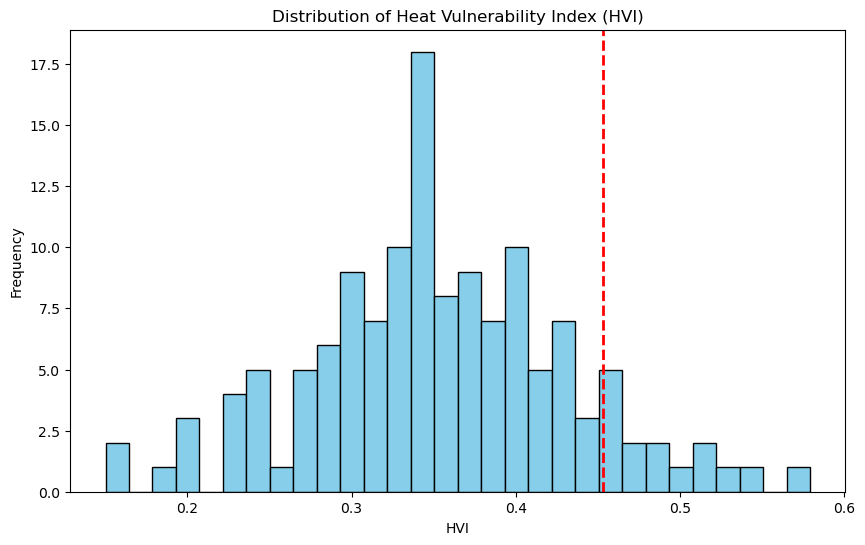

In [6]:
import geopandas as gpd
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import geemap
import ee

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Load the GeoJSON file
geojson_path = 'JHB_GCRO_Selected_variables.geojson'
gdf = gpd.read_file(geojson_path)

# Sanitize the property names
def sanitize_column_names(gdf):
    gdf.columns = gdf.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)
    return gdf

gdf = sanitize_column_names(gdf)

# Select relevant columns for HVI calculation
columns = [
    'UTFVI', 'LST', 'NDVI', 'NDBI__mean', 'concern_he', 'cancer_pro',
    'diabetes_p', 'pneumonia_', 'heart_dise', 'hypertensi', 'hiv_prop',
    'tb_prop', 'covid_prop', '60_plus_pr'
]

# Ensure columns are numeric and fill missing values
for col in columns:
    gdf[col] = pd.to_numeric(gdf[col], errors='coerce')
gdf = gdf.dropna(subset=columns)

# Normalize the data
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(gdf[columns])

# Create the composite HVI by averaging the normalized features
gdf['HVI'] = normalized_features.mean(axis=1)

# Convert the GeoDataFrame to an Earth Engine object
ee_fc = geemap.geopandas_to_ee(gdf)

# Create a map
Map = geemap.Map()

# Define visualization parameters for HVI
vis_params_hvi = {
    'min': gdf['HVI'].min(),
    'max': gdf['HVI'].max(),
    'palette': ['blue', 'green', 'yellow', 'red']
}

# Add HVI layer to the map
ee_image_hvi = ee_fc.reduceToImage(['HVI'], ee.Reducer.first())
Map.addLayer(ee_image_hvi, vis_params_hvi, 'Heat Vulnerability Index (HVI)')

# Highlight wards with the highest HVI (top 10%)
threshold = 0.4532776490332661
high_hvi_wards = gdf[gdf['HVI'] >= threshold]

# Convert the high HVI wards to an Earth Engine object
ee_fc_high_hvi = geemap.geopandas_to_ee(high_hvi_wards)

# Define visualization parameters for high HVI wards
vis_params_high_hvi = {
    'color': 'red'
}

# Add high HVI wards layer to the map
Map.addLayer(ee_fc_high_hvi, vis_params_high_hvi, 'High HVI Wards')

# Center the map on the data
Map.centerObject(ee_fc, 10)

# Display the map in a Jupyter Notebook environment
Map

# Print the high HVI wards
print("High HVI Wards:")
print(high_hvi_wards[['WardID_', 'WardNo_', 'HVI']])

# Plot the HVI distribution and highlight the threshold
plt.figure(figsize=(10, 6))
plt.hist(gdf['HVI'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribution of Heat Vulnerability Index (HVI)')
plt.xlabel('HVI')
plt.ylabel('Frequency')
plt.show()


In [7]:
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler
import geemap
import ee

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Load the GeoJSON file
geojson_path = 'JHB_GCRO_Selected_variables.geojson'
gdf = gpd.read_file(geojson_path)

# Sanitize the property names
def sanitize_column_names(gdf):
    gdf.columns = gdf.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)
    return gdf

gdf = sanitize_column_names(gdf)

# Select relevant columns for HVI calculation
columns = [
    'UTFVI', 'LST', 'NDVI', 'NDBI__mean', 'concern_he', 'cancer_pro',
    'diabetes_p', 'pneumonia_', 'heart_dise', 'hypertensi', 'hiv_prop',
    'tb_prop', 'covid_prop', '60_plus_pr'
]

# Ensure columns are numeric and fill missing values
for col in columns:
    gdf[col] = pd.to_numeric(gdf[col], errors='coerce')
gdf = gdf.dropna(subset=columns)

# Normalize the data
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(gdf[columns])

# Create the composite HVI by averaging the normalized features
gdf['HVI'] = normalized_features.mean(axis=1)

# Convert the GeoDataFrame to an Earth Engine object
ee_fc = geemap.geopandas_to_ee(gdf)

# Create a map
Map = geemap.Map()

# Define visualization parameters for HVI
vis_params_hvi = {
    'min': gdf['HVI'].min(),
    'max': gdf['HVI'].max(),
    'palette': ['blue', 'green', 'yellow', 'red']
}

# Add HVI layer to the map
ee_image_hvi = ee_fc.reduceToImage(['HVI'], ee.Reducer.first())
Map.addLayer(ee_image_hvi, vis_params_hvi, 'Heat Vulnerability Index (HVI)')

# Highlight wards with the highest HVI (top 10%)
threshold = gdf['HVI'].quantile(0.9)
high_hvi_wards = gdf[gdf['HVI'] >= threshold]

# Convert the high HVI wards to an Earth Engine object
ee_fc_high_hvi = geemap.geopandas_to_ee(high_hvi_wards)

# Define visualization parameters for high HVI wards
vis_params_high_hvi = {
    'color': 'red'
}

# Add high HVI wards layer to the map
Map.addLayer(ee_fc_high_hvi, vis_params_high_hvi, 'High HVI Wards')

# Center the map on the data
Map.centerObject(ee_fc, 10)

# Display the map
Map


Map(center=[-26.176814917998072, 27.9632492022089], controls=(WidgetControl(options=['position', 'transparent_…